In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression #one of the ML Models
from sklearn.metrics import r2_score # for evaluate model

### Coordinate'lardaki scientific notation olan e-3'ü floata convert etmek için aşağıdaki kod yazılabilir:
```python
ax.format_coord = lambda x,y: f"x={np.format_float_positional(round(x,2))}, y={np.format_float_positional(round(y,2))}"
```

# 1-Read Data

In [2]:
df = pd.read_csv("dataset.csv", sep = ";")
df.head()

,experience,salary
0,0.5,2500
1,0.0,2250
2,1.0,2750
3,5.0,8000
4,8.0,9000


# 2-Plotting Data

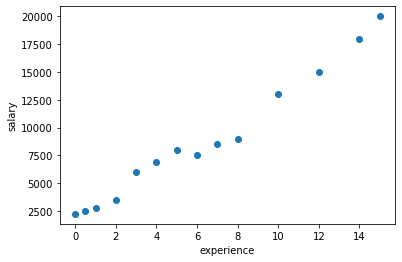

In [3]:
#%matplotlib qt5

# plot data
fig, ax = plt.subplots()

plt.scatter(df.experience,df.salary)
plt.xlabel("experience")
plt.ylabel("salary")
plt.ticklabel_format(style='plain')    # to prevent scientific notation in x and y axis

# to prevent scientific notation in specific coordinates
ax.format_coord = lambda x,y: f"x={np.format_float_positional(round(x,2))}, y={np.format_float_positional(round(y,2))}" 

plt.show()

# 3-Create Regression Model

In [4]:
# linear regression model
linear_reg = LinearRegression()

In [5]:
df.experience.values.shape # (14,) = 14,1

(14,)

### Note
- Pandas'ı numpy'ye çevirmek için: ```df.experience.values``` yapmamız yeterlidir.
  
- (14, ) sklearn tanımaz, (14,1)'i tanır. Bu yüzden reshape yapıp (14,1) olarak tanımlanır.

- -1x1 boyutunda matris olmaz. Buradaki -1, matrisin mevcut değerini aynen alır anlamında kullanılır. (yani 14x1)

In [6]:
x = df.experience.values.reshape(-1,1)  
x

array([[ 0.5],
       [ 0. ],
       [ 1. ],
       [ 5. ],
       [ 8. ],
       [ 4. ],
       [15. ],
       [ 7. ],
       [ 3. ],
       [ 2. ],
       [12. ],
       [10. ],
       [14. ],
       [ 6. ]])

In [7]:
y = df.salary.values.reshape(-1,1)
y

array([[ 2500],
       [ 2250],
       [ 2750],
       [ 8000],
       [ 9000],
       [ 6900],
       [20000],
       [ 8500],
       [ 6000],
       [ 3500],
       [15000],
       [13000],
       [18000],
       [ 7500]], dtype=int64)

# 4-Applying Model

In [8]:
linear_reg.fit(x, y)

LinearRegression()

### Formula
<font color='red'>

- y = y0 + (slope * x)

- residual = y - y_pred

- MSE = sum(residual^2/n) minimum olmalı

In [9]:
y0 = linear_reg.intercept_ # y eksenini kestiği nokta (intercept)
print("y0: ", y0)

y0:  [1663.89519747]


In [10]:
slope = linear_reg.coef_ # doğrunun eğimi (slope of the line)
print("slope: ", slope)

slope:  [[1138.34819698]]


# 5-Predict Data

In [11]:
predict_salary1 = linear_reg.predict([[11]]) # first method
print(predict_salary1)

# OR

predict_salary2 = y0 + slope * 11 # second method
print(predict_salary2)

[[14185.72536421]]
[[14185.72536421]]


# 6-Visualize Line

In [12]:
%matplotlib qt5
array = np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]).reshape(-1,1)  # experience

# plot data
fig, ax = plt.subplots()

plt.scatter(x,y)
plt.show()

y_pred = linear_reg.predict(array)  # salary

# to prevent scientific notation in specific coordinates
ax.format_coord = lambda x,y: f"x={np.format_float_positional(round(x,2))}, y={np.format_float_positional(round(y,2))}" 

plt.plot(array, y_pred, color = "red")

linear_reg.predict([[30]])

array([[35814.34110674]])

# 7-Evaluate Model

In [13]:
y_test = linear_reg.predict(x) # normalde ayrı bir test datası olur.
print("r_square score: ", r2_score(y, y_test))

r_square score:  0.9775283164949902
